In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [3]:
digits=pd.read_csv("mlfolder/CSV_Files/digits_train.csv")

In [4]:
digits.shape

(42000, 785)

In [5]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=digits.iloc[:,1:]

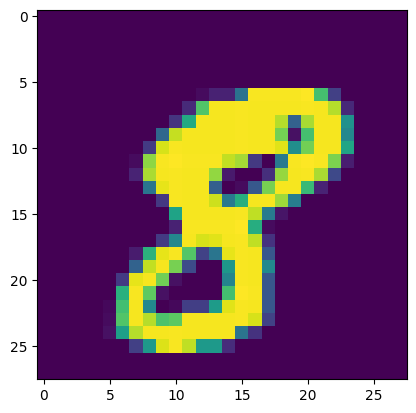

In [7]:
plt.imshow(np.array(data.iloc[10,:]).reshape(28,28))

In [8]:
digits.iloc[10,0]

np.int64(8)

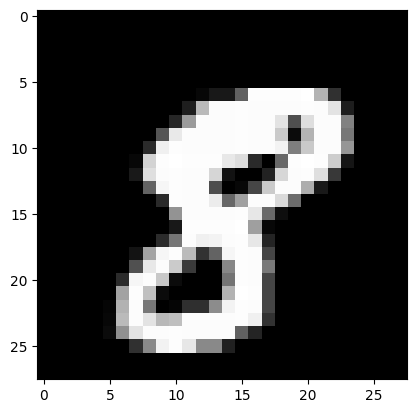

In [9]:
plt.imshow(np.array(data.iloc[10,:]).reshape(28,28),cmap='gray')

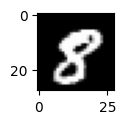

In [10]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(np.array(data.iloc[10,:]).reshape(28,28), cmap="gray")

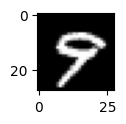

In [11]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(np.array(data.iloc[121,:]).reshape(28,28), cmap="gray")

In [12]:
imarray=np.array(data.iloc[10,:]).reshape(28,28)

In [13]:
digits_test=pd.read_csv('mlfolder/CSV_Files/digits_test.csv')

In [14]:
digits_test.shape

(28000, 784)

In [15]:
Xtest=digits_test

In [16]:
Xtrain=data
ytrain=digits.iloc[:,0]

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [19]:
predictions=knn.predict(Xtest)

In [20]:
predictions[0]

np.int64(2)

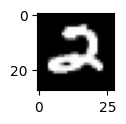

In [21]:
fig,ax=plt.subplots(figsize=(1,1))
ax.imshow(np.array(Xtest.iloc[0,:]).reshape(28,28),cmap='gray')

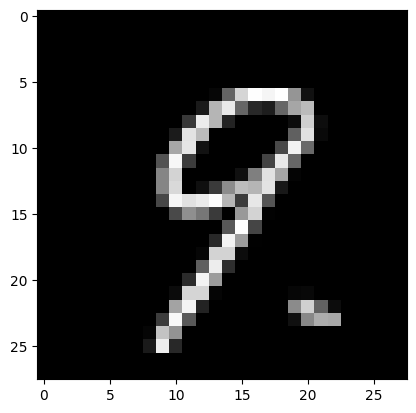

In [22]:
plt.imshow(np.array(Xtest.iloc[2,:]).reshape(28,28), cmap="gray")

In [23]:
predictions[2]

np.int64(9)

In [24]:
rfc=RandomForestClassifier(random_state=142)

In [25]:
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=142)

In [26]:
pred=rfc.predict(Xtest)

In [27]:
pred[2]

np.int64(9)

In [32]:
np.random.seed(42)
indexes=np.random.choice(28000,40,replace=False)

In [33]:
imagesIndexArray=indexes.reshape(5,8)

In [34]:
imagesIndexArray

array([[18406,  5034, 18325, 22980, 26031,  5554, 20575,  1921],
       [22617,  1388, 17349, 10455, 16606, 23701, 11270, 13126],
       [ 6025, 18921,  6198, 20375,  1598, 17389,  8316, 24569],
       [ 5379,  9929,  5589,  4900,  6379, 14845, 11769,  5535],
       [27410,  9000,  7976, 25575,  7339, 19717, 10854,  6689]])

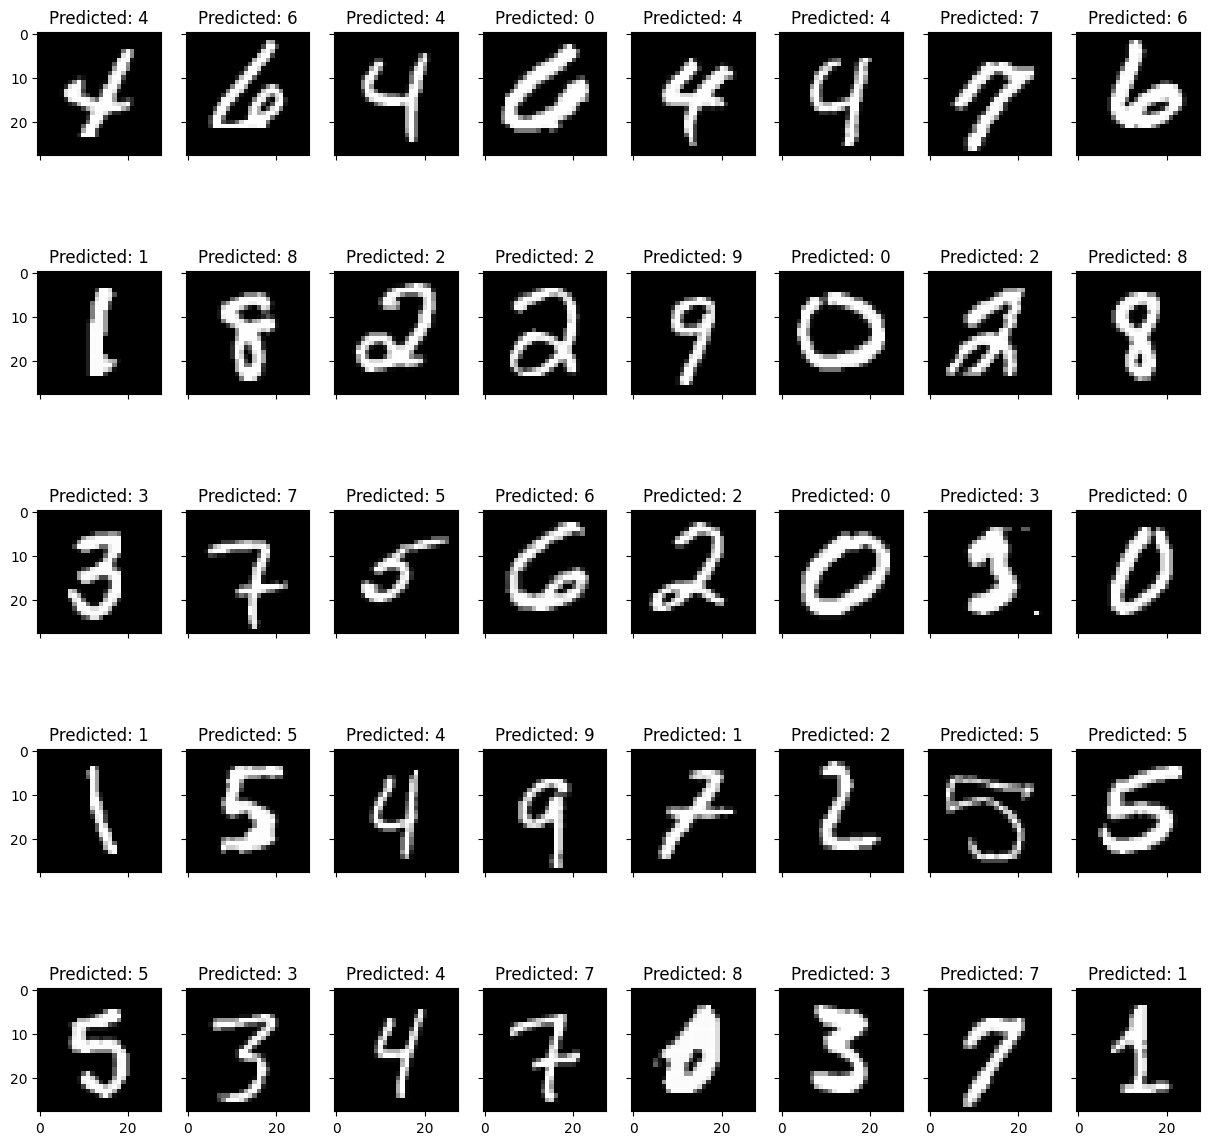

In [36]:
fig,ax=plt.subplots(5,8,figsize=(15,15),sharex=True,sharey=True)
plt.gray()
for i in np.arange(5):
    for j in np.arange(8):
        ax[i,j].imshow(np.array(Xtest.iloc[imagesIndexArray[i][j],:]).reshape(28,28))
        ax[i,j].set_title("Predicted: "+str(pred[imagesIndexArray[i,j]]))

In [37]:
pca=PCA(n_components=0.9)
pca.fit(Xtrain)

PCA(n_components=0.9)

In [38]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397506, 0.00384542,
       0.00374919, 0.00361013, 0.00348522, 0.00336488, 0.00320738,
       0.00315467, 0.00309146, 0.00293709, 0.00286541, 0.00280759,
       0.00269618, 0.00265831, 0.00256299, 0.00253821, 0.00246178,
       0.00239716, 0.0023874 , 0.00227591, 0.00221518, 0.00213934,
       0.00206133, 0.00202851, 0.00195977, 0.00193639, 0.00188485,
       0.00186751, 0.0018167 , 0.00176891, 0.00172592, 0.00166

In [39]:
pca.n_components_

np.int64(87)

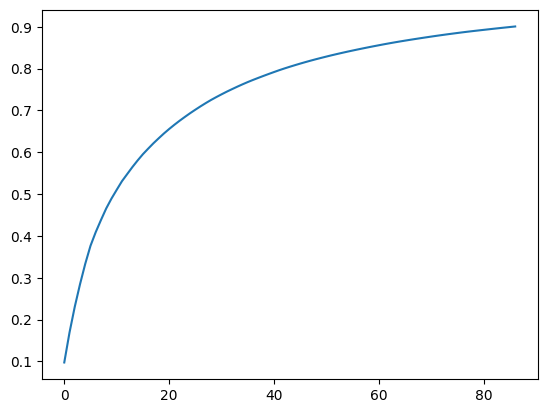

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [41]:
transformTrain=pca.transform(Xtrain)

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(transformTrain,ytrain)

KNeighborsClassifier()

In [45]:
transformed_predict=knn.predict(pca.transform(Xtest))

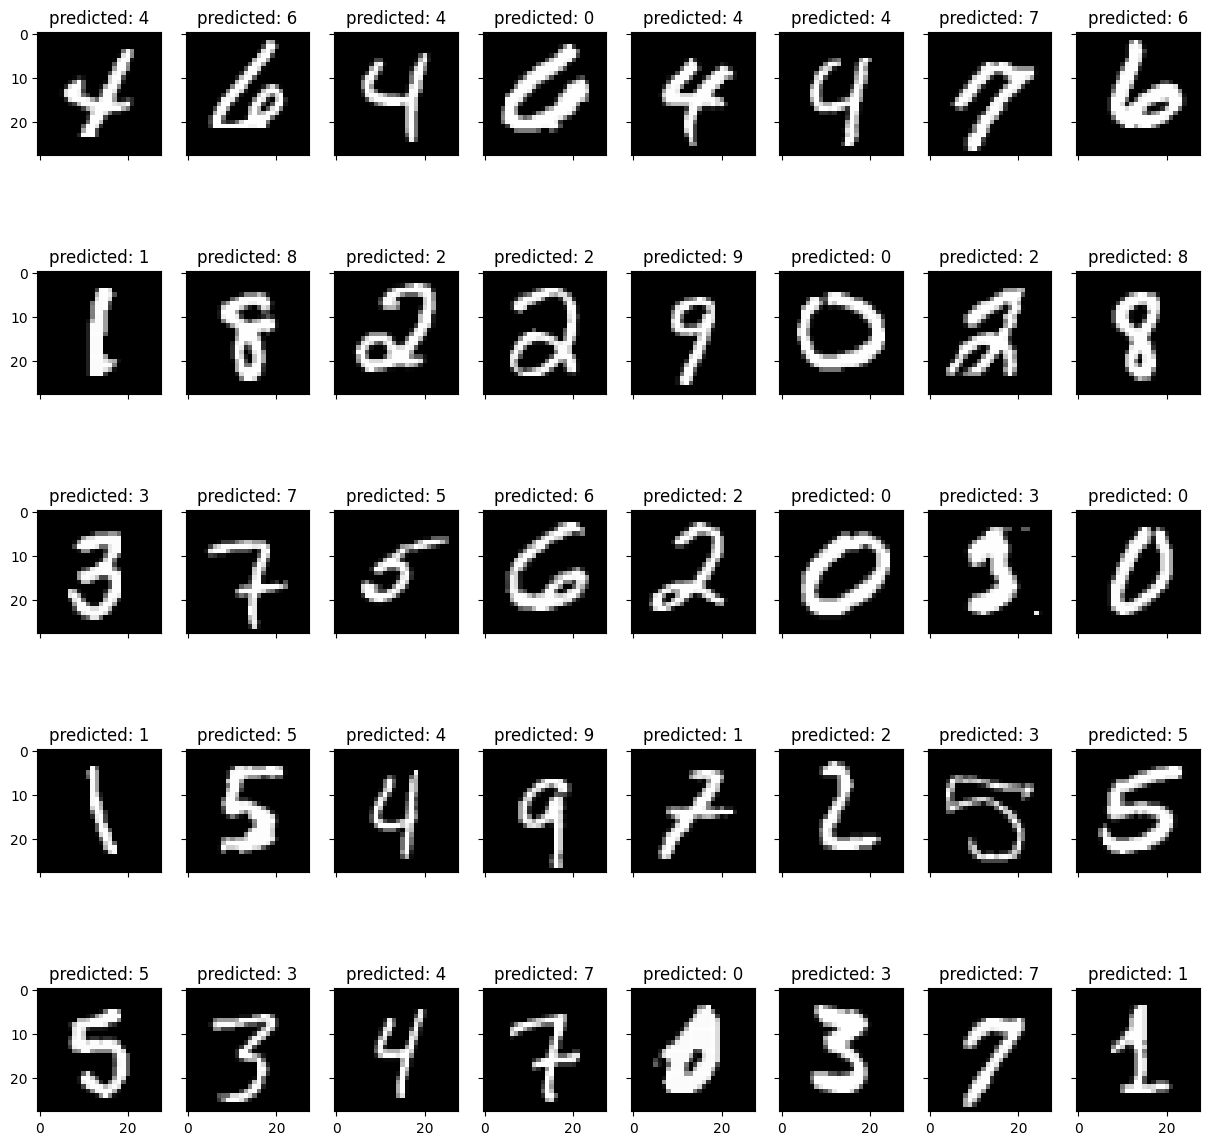

In [48]:
fig, ax = plt.subplots(5,8, figsize=(15,15),sharex=True, sharey=True)
plt.gray()
for i in np.arange(5):
    for j in np.arange(8):
        ax[i,j].imshow(np.array(Xtest.iloc[imagesIndexArray[i][j],:]).reshape(28,28))
        ax[i,j].set_title("predicted: "+str(transformed_predict[imagesIndexArray[i,j]]))